In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import linregress

In [3]:
min_n_slice = 2
max_vol = 10**2.4
max_GFP_med = 10**2.1

cmap = matplotlib.cm.get_cmap('tab10')

/var/folders/1r/_dnhk2ss6m3fr8s3lgl4kcmw0000gn/T/ipykernel_84744/2605147227.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


## QC

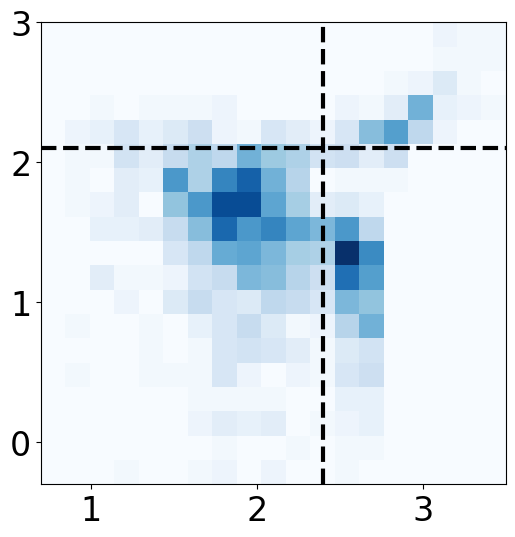

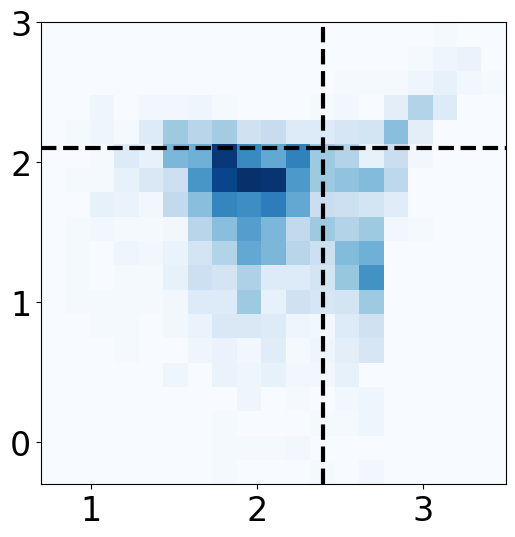

In [5]:
for GFP in [60,120]:

    data = pd.read_csv(f'std_cndl_csvs/{GFP}GFP.csv')

    filtered = data[(data['GFP_med']>0) & (data['n_slices']>=min_n_slice)]
    
    plt.figure(figsize=[6,6])
    plt.hist2d(np.log10(filtered['volume']),np.log10(filtered['GFP_med']),
               bins=[np.linspace(0.7,3.5,20),np.linspace(-0.3,3,20)],cmap='Blues')
    
    plt.plot([2.4,2.4],[-0.3,3],'k--',linewidth=3)
    plt.plot([0.7,3.5],[2.1,2.1],'k--',linewidth=3)
    
    plt.xticks([1,2,3],fontsize=24)
    plt.yticks([0,1,2,3],fontsize=24)
    
    plt.savefig(f'{GFP}GFP_QC.png',dpi=1000,bbox_inches='tight')

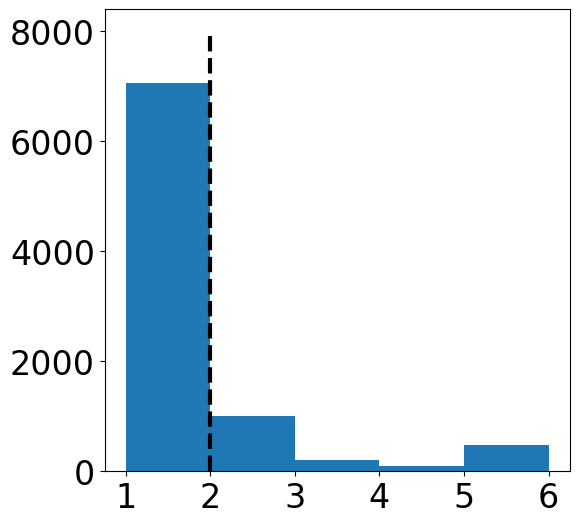

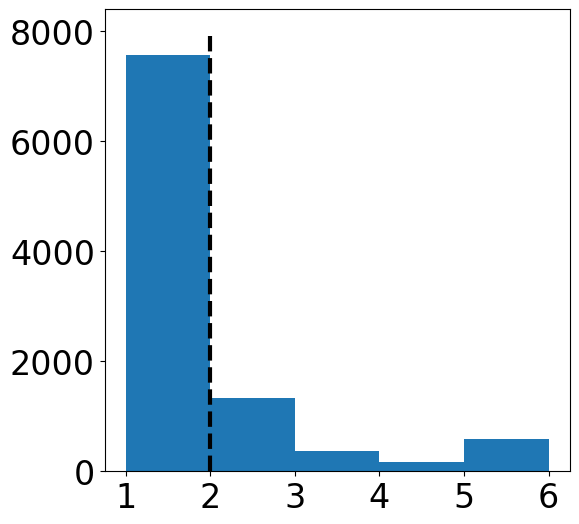

In [6]:
for GFP in [60,120]:

    data = pd.read_csv(f'std_cndl_csvs/{GFP}GFP.csv')
    
    plt.figure(figsize=[6,6])
    plt.hist(data['n_slices'],bins=range(1,7))
    
    plt.plot([2,2],[0,8000],'k--',linewidth=3)
    
    plt.xticks(fontsize=24)
    plt.yticks([0,2000,4000,6000,8000],fontsize=24)
    
    plt.savefig(f'{GFP}GFP_slices.png',dpi=1000,bbox_inches='tight')

## fitting

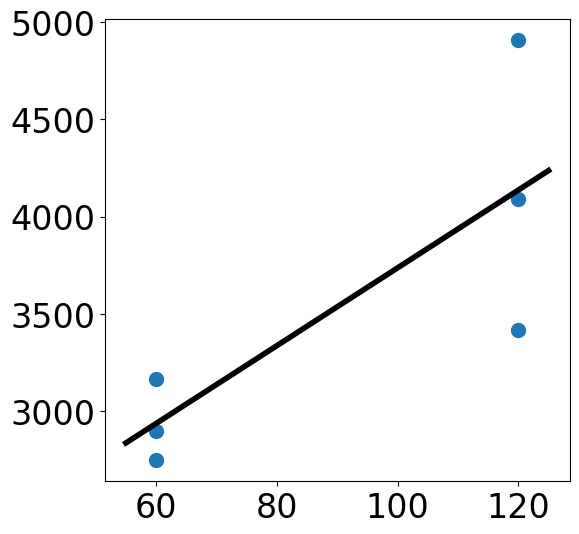

In [8]:
means = np.zeros([3,2])
for i,GFP in enumerate([60,120]):

    data = pd.read_csv(f'std_cndl_csvs/{GFP}GFP.csv')

    filtered = data[(data['n_slices'] >= min_n_slice) & \
                    (data['volume'] < max_vol) & \
                    (data['GFP_med'] < max_GFP_med)]
    
    groups = filtered.groupby('rep')
    for g,group in groups:
        means[g-1,i] = np.median(group['GFP_tot'])

plt.figure(figsize=[6,6])

N_GFP = np.tile([60,120],[3,1]).flatten()
GFP = means.flatten()
plt.plot(N_GFP,GFP,'o',markersize=10)

fit = linregress(N_GFP,GFP)
x_fit = np.linspace(55,125,1000)
y_fit = fit.slope*x_fit + fit.intercept
plt.plot(x_fit,y_fit,'k-',linewidth=4)

plt.xticks([60,80,100,120],fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(f'fitting.png',dpi=1000,bbox_inches='tight')

In [9]:
fit

LinregressResult(slope=20.024107135372503, intercept=1733.441169113883, rvalue=0.8013468671700018, pvalue=0.05527486981125033, stderr=7.473929632813189, intercept_stderr=709.039221345468)